In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

c:\Users\89556\.conda\envs\pydata\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# 使用pandas和seaborn绘图

## 线形图

<Axes: >

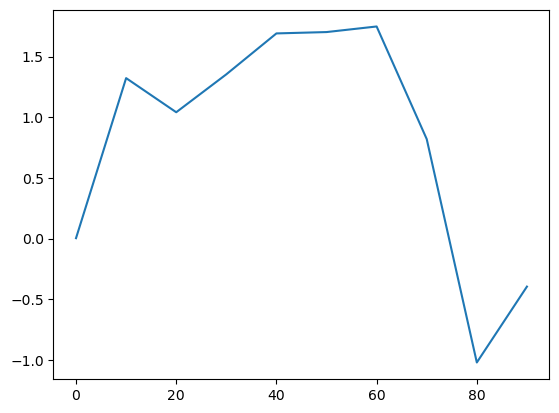

In [2]:
s = pd.Series(np.random.standard_normal(10).cumsum(),index=np.arange(0,100,10))

s.plot()

<Axes: >

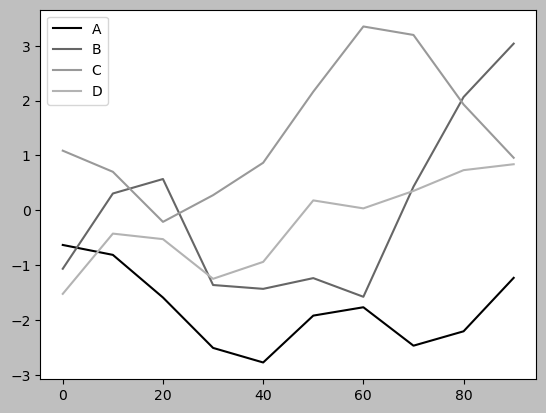

In [5]:
df = pd.DataFrame(np.random.standard_normal((10,4)).cumsum(0),
                  columns=['A','B','C','D'],
                  index=np.arange(0,100,10))

plt.style.use('grayscale')

df.plot()

## 柱状图

<Axes: >

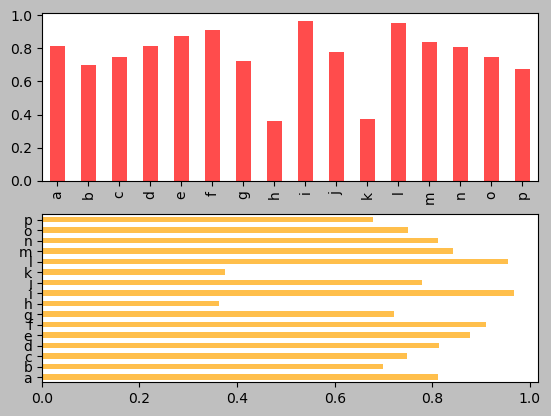

In [8]:
fig,axes = plt.subplots(2,1)

data = pd.Series(np.random.uniform(size=16),index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0],color='red',alpha=0.7)

data.plot.barh(ax=axes[1],color='orange',alpha=0.7)

In [9]:
df = pd.DataFrame(np.random.uniform(size=(6,4)),
                  index=['one','two','three','four','five','six'],
                  columns=pd.Index(['A','B','C','D'],name='Genus'))

df

Genus,A,B,C,D
one,0.729287,0.565015,0.487722,0.143183
two,0.918732,0.885503,0.852955,0.901349
three,0.404322,0.226660,0.194367,0.905953
four,0.431903,0.697732,0.898094,0.978875
five,0.403322,0.129943,0.637580,0.881058
six,0.031856,0.867903,0.412970,0.491215


<Axes: >

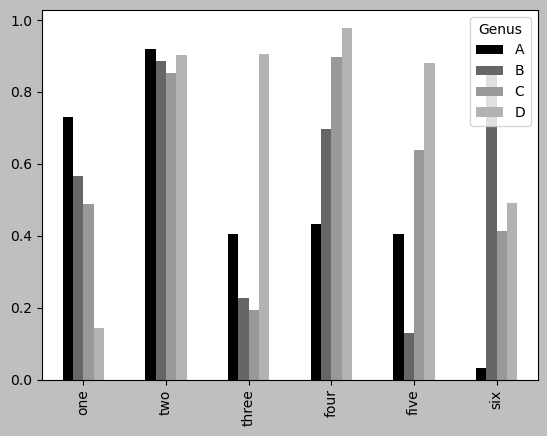

In [11]:
df.plot.bar()

<Axes: >

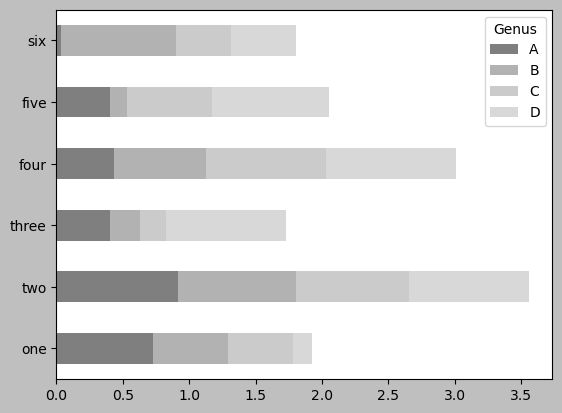

In [12]:
df.plot.barh(stacked=True,alpha=0.5)

In [13]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [16]:
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts = party_counts.reindex(index=['Thur','Fri','Sat','Sun'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [17]:
party_counts = party_counts.loc[:,2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [18]:
# 正态化
party_pcts = party_counts.div(party_counts.sum(axis='columns'), axis='index')
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

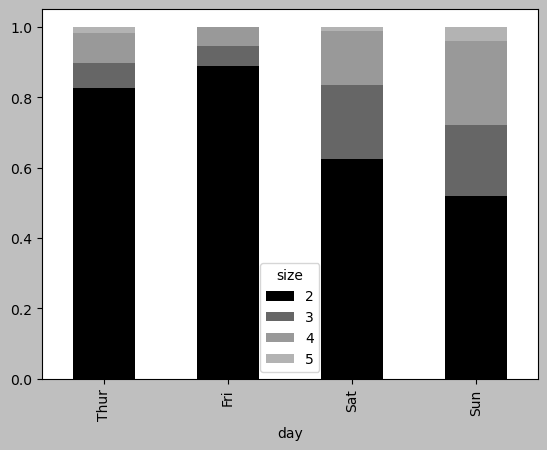

In [19]:
party_pcts.plot.bar(stacked=True)

In [20]:
import seaborn as sns

In [22]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


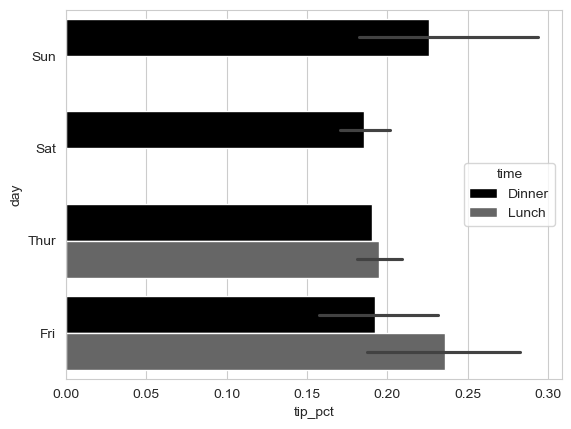

In [26]:
sns.barplot(x='tip_pct',y='day',hue='time',data=tips,orient='h')

sns.set_sty·le('whitegrid')

sns.set_palette('Greys_r')

## 直方图和密度图

<Axes: ylabel='Frequency'>

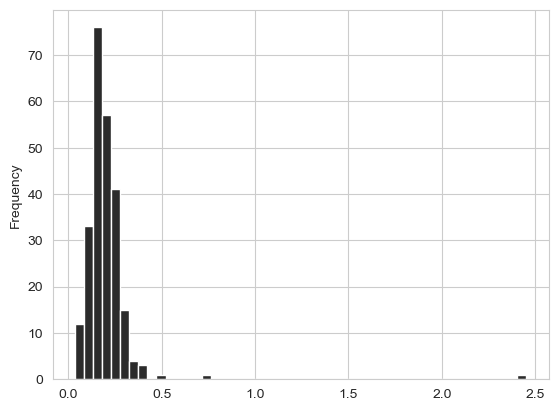

In [27]:
tips['tip_pct'].plot.hist(bins=50)

<Axes: ylabel='Density'>

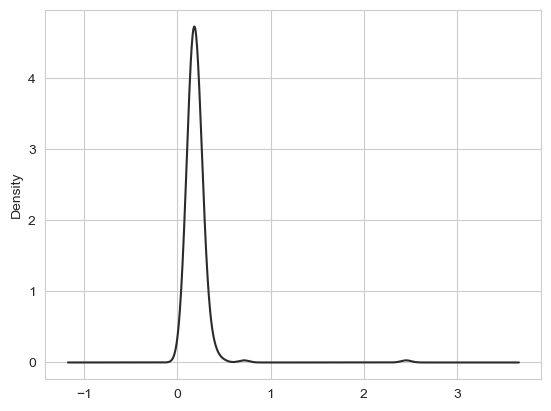

In [28]:
tips['tip_pct'].plot.density()

<Axes: ylabel='Count'>

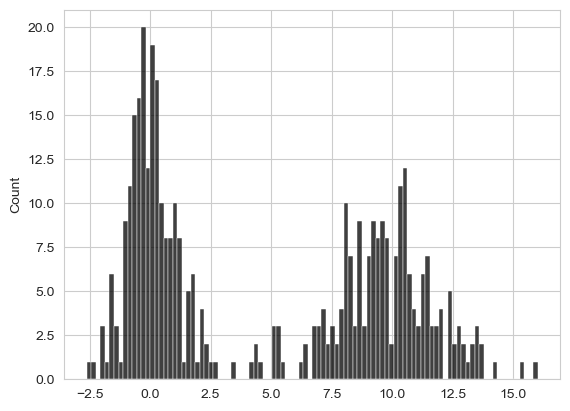

In [29]:
comp1 = np.random.standard_normal(200)

comp2 = 10 + 2 * np.random.standard_normal(200)

values = pd.Series(np.concatenate([comp1,comp2]))

sns.histplot(values,bins=100,color='black')

## 散点图或点图

In [30]:
macro = pd.read_csv("examples/macrodata.csv")

data = macro[["cpi","m1","tbilrate","unemp"]]

trans_data = np.log(data).diff().dropna()

trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


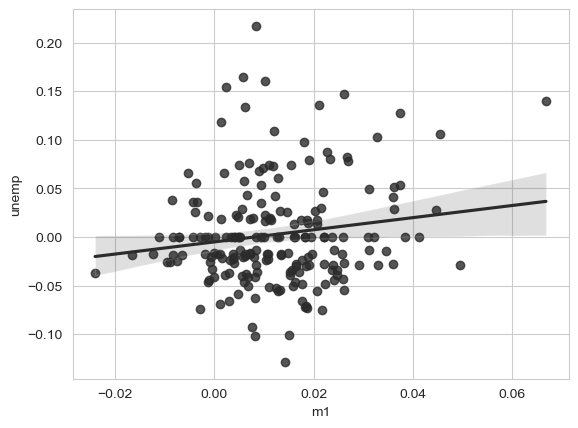

In [31]:
ax = sns.regplot(x='m1', y='unemp', data=trans_data)

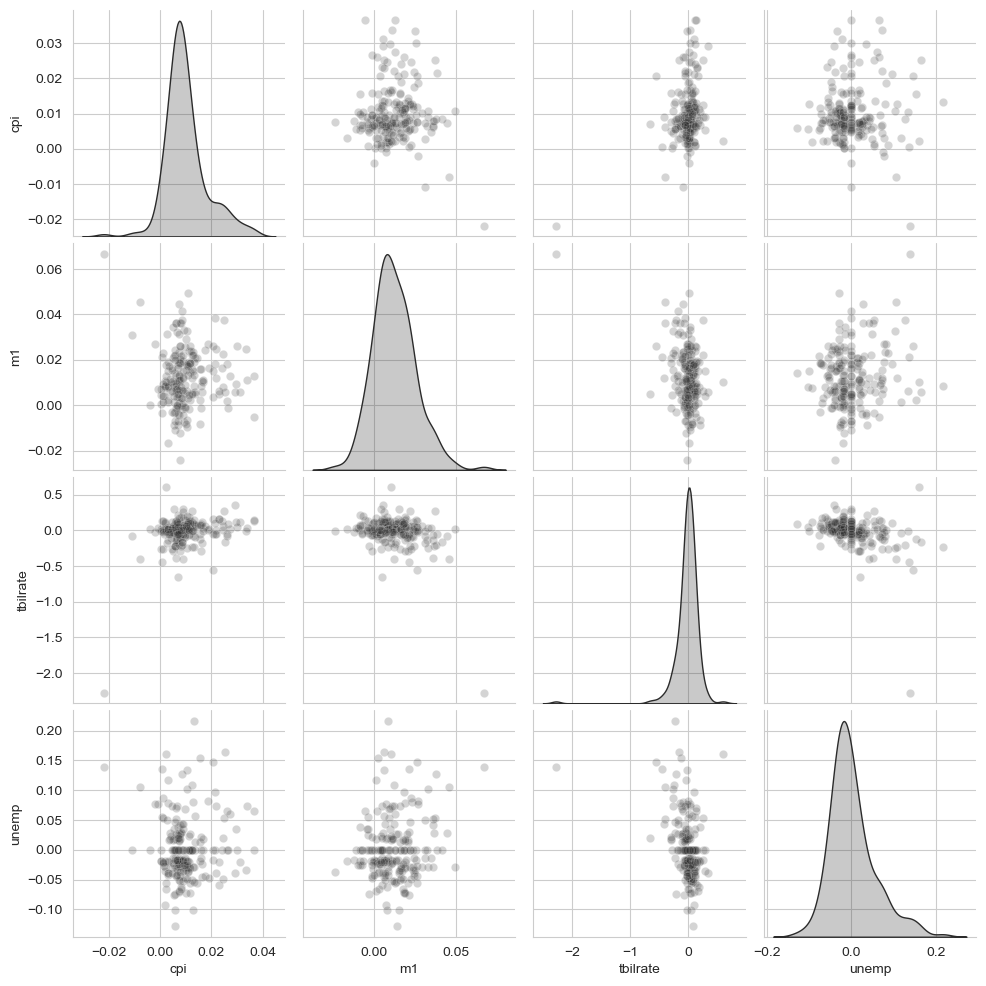

In [37]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha" : 0.2})

## 分面网格和分类数据

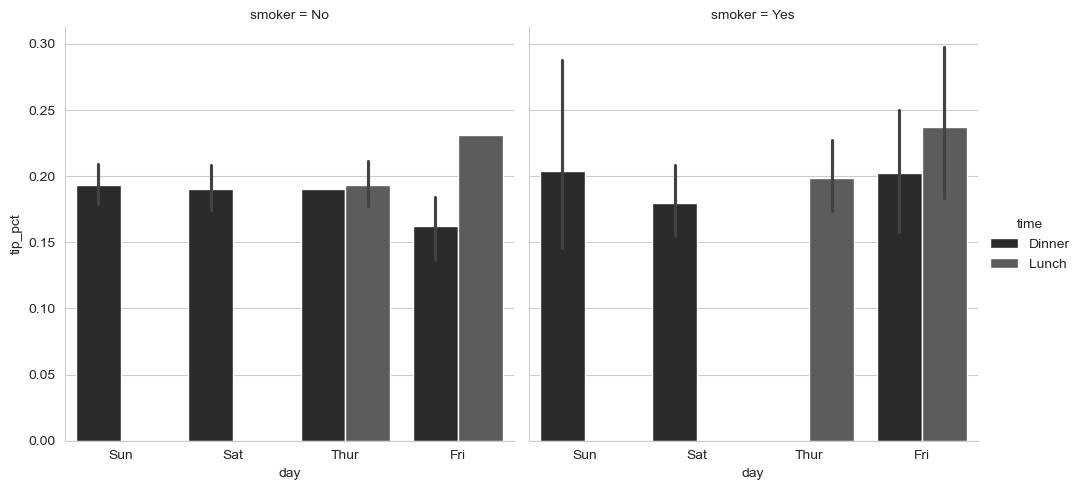

In [39]:
sns.catplot(x='day',y='tip_pct',hue='time',col='smoker',kind='bar',data=tips[tips.tip_pct<1])

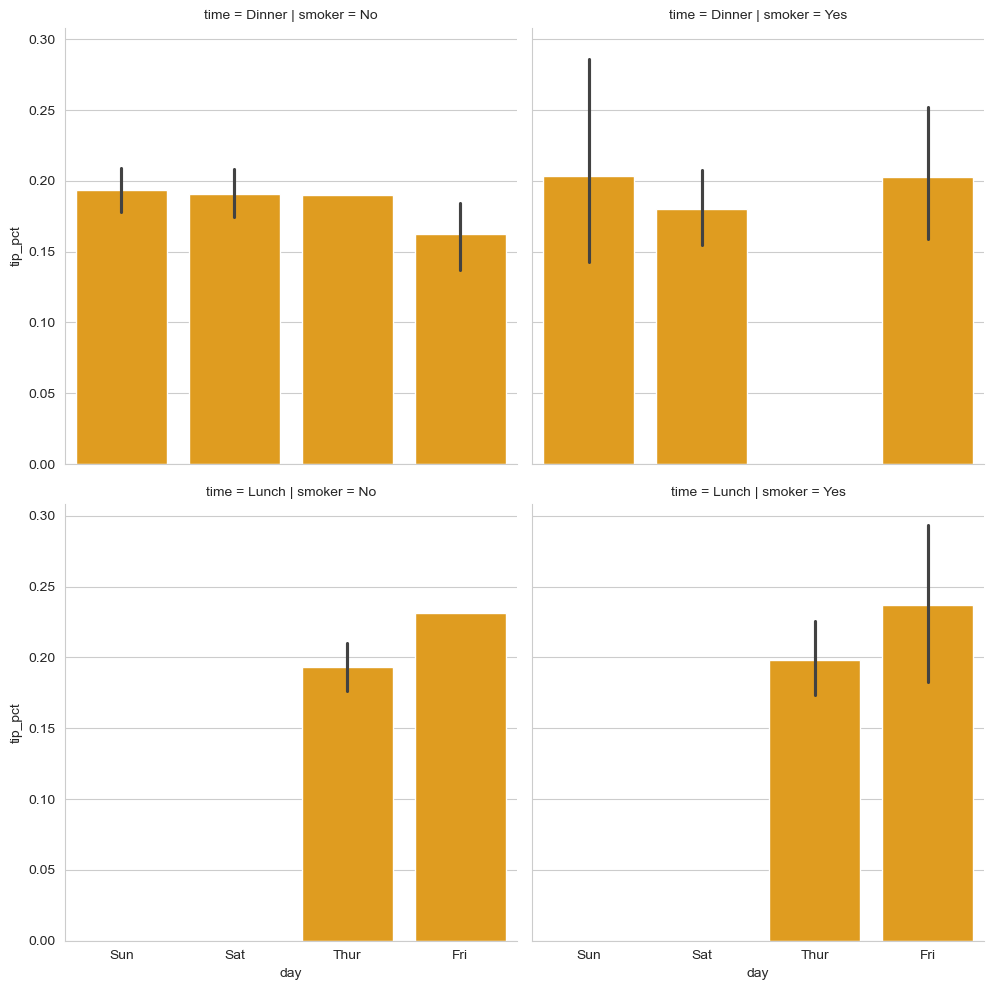

In [41]:
sns.catplot(x='day',y='tip_pct',row='time',col='smoker',kind='bar',data=tips[tips.tip_pct<1],color='orange')
